In [85]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from matplotlib.colors import LogNorm
import pandas as pd
import numpy as np
import os

plt.rcParams['figure.dpi'] = 300

In [43]:
# Get correlations
CORRELATIONS = pd.read_csv("../output/05_correlations_toremove.tsv", sep='\t')

# Get model names
CORRELATIONS['FullModelName1'] = ["-".join((i,j,k)) for i,j,k in zip(CORRELATIONS['Pathogen1'], CORRELATIONS['Task1'], CORRELATIONS['Model1'])]
CORRELATIONS['FullModelName2'] = ["-".join((i,j,k)) for i,j,k in zip(CORRELATIONS['Pathogen2'], CORRELATIONS['Task2'], CORRELATIONS['Model2'])]

# Get all models
ALL_MODELS = set(CORRELATIONS['FullModelName1']).union(CORRELATIONS['FullModelName1'])

# Get correlations
name_to_spearman = {(i,j): [k,l] for i,j,k,l in zip(CORRELATIONS['FullModelName1'], CORRELATIONS['FullModelName2'], 
                                            CORRELATIONS['Spearman statistic'], CORRELATIONS['Spearman pvalue'])}

# Define some paths
PATH_TO_PREDICTIONS = os.path.join("..", "output", "04_predictions_drugbank_toremove")

In [44]:
# # Set correlation matrix to build
# labels = [i for i in sorted(ALL_MODELS) if i.split("-")[2] == 'NB']

# # Get model inds
# name_to_ind = {name: c for c, name in enumerate(sorted(labels))}

# # Build matrix
# X = np.zeros((len(labels), len(labels)))

# # Fill the matrix
# for lab1 in labels:
#     for lab2 in labels:
#         t = tuple(sorted((lab1, lab2)))
#         X[name_to_ind[lab1]][name_to_ind[lab2]] = name_to_spearman[t][0]

# plt.imshow(X, vmin=0.5, vmax=1)
# cbar = plt.colorbar()
# cbar.set_label('Spearman correlation', labelpad=11)
# plt.show()

In [45]:
CORRELATIONS

,Pathogen1,Task1,Model1,Pathogen2,Task2,Model2,Spearman statistic,Spearman pvalue,Pearson statistic,Pearson pvalue,Kendall statistic,Kendall pvalue,Same pathogen,Same task,Same model,FullModelName1,FullModelName2
0,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,NB,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,NB,1.000000,0.0,1.000000,0.000000e+00,1.000000,0.0,True,True,True,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...
1,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,NB,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,RF,0.538323,0.0,0.444846,0.000000e+00,0.376523,0.0,True,True,False,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...
2,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,NB,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,FLAML,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...
3,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,NB,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,NB,0.748674,0.0,0.627760,0.000000e+00,0.564264,0.0,True,False,True,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...
4,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,NB,abaumannii_organism,1_assay_CHEMBL4296188_Inhibition_percentage_ac...,RF,0.526957,0.0,0.313188,2.024979e-269,0.370738,0.0,True,False,False,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...,abaumannii_organism-1_assay_CHEMBL4296188_Inhi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986305,spneumoniae_organism,5_grouped_percentiles_5_ORGANISM_1,NB,spneumoniae_organism,5_grouped_percentiles_5_ORGANISM_1,RF,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,spneumoniae_organism-5_grouped_percentiles_5_O...,spneumoniae_organism-5_grouped_percentiles_5_O...
986306,spneumoniae_organism,5_grouped_percentiles_5_ORGANISM_1,NB,spneumoniae_organism,5_grouped_percentiles_5_ORGANISM_1,FLAML,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,spneumoniae_organism-5_grouped_percentiles_5_O...,spneumoniae_organism-5_grouped_percentiles_5_O...
986307,spneumoniae_organism,5_grouped_percentiles_5_ORGANISM_1,RF,spneumoniae_organism,5_grouped_percentiles_5_ORGANISM_1,RF,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,spneumoniae_organism-5_grouped_percentiles_5_O...,spneumoniae_organism-5_grouped_percentiles_5_O...
986308,spneumoniae_organism,5_grouped_percentiles_5_ORGANISM_1,RF,spneumoniae_organism,5_grouped_percentiles_5_ORGANISM_1,FLAML,NaN,NaN,NaN,NaN,NaN,NaN,True,True,False,spneumoniae_organism-5_grouped_percentiles_5_O...,spneumoniae_organism-5_grouped_percentiles_5_O...


In [46]:
# Focus on NB correlations exclusively
CORRELATIONS = CORRELATIONS[(CORRELATIONS['Model1'] == 'NB') & (CORRELATIONS['Model2'] == 'NB')].reset_index(drop=True)

# Filter same task in the same pathogen
CORRELATIONS = CORRELATIONS[~((CORRELATIONS['Same pathogen'] == True) & (CORRELATIONS['Same task'] == True))]


# Get correlations inter & intra
CORRELATIONS_INTER = np.array(CORRELATIONS[CORRELATIONS['Same pathogen'] == False].reset_index(drop=True)['Spearman statistic'].tolist())
CORRELATIONS_INTRA = np.array(CORRELATIONS[CORRELATIONS['Same pathogen'] == True].reset_index(drop=True)['Spearman statistic'].tolist())

# Select cutoffs
thrs = np.linspace(-1, 1, 100)

# Get cumulative values
cumulative_inter = []
cumulative_intra = []

for thr in thrs:

    # Get cumulative proportions
    cumulative_inter.append(len(np.where(CORRELATIONS_INTER <= thr)[0]) / len(CORRELATIONS_INTER))
    cumulative_intra.append(len(np.where(CORRELATIONS_INTRA <= thr)[0]) / len(CORRELATIONS_INTRA))

In [47]:
# Number of tasks
len(set(CORRELATIONS['FullModelName1'].tolist() + CORRELATIONS['FullModelName2'].tolist()))

468

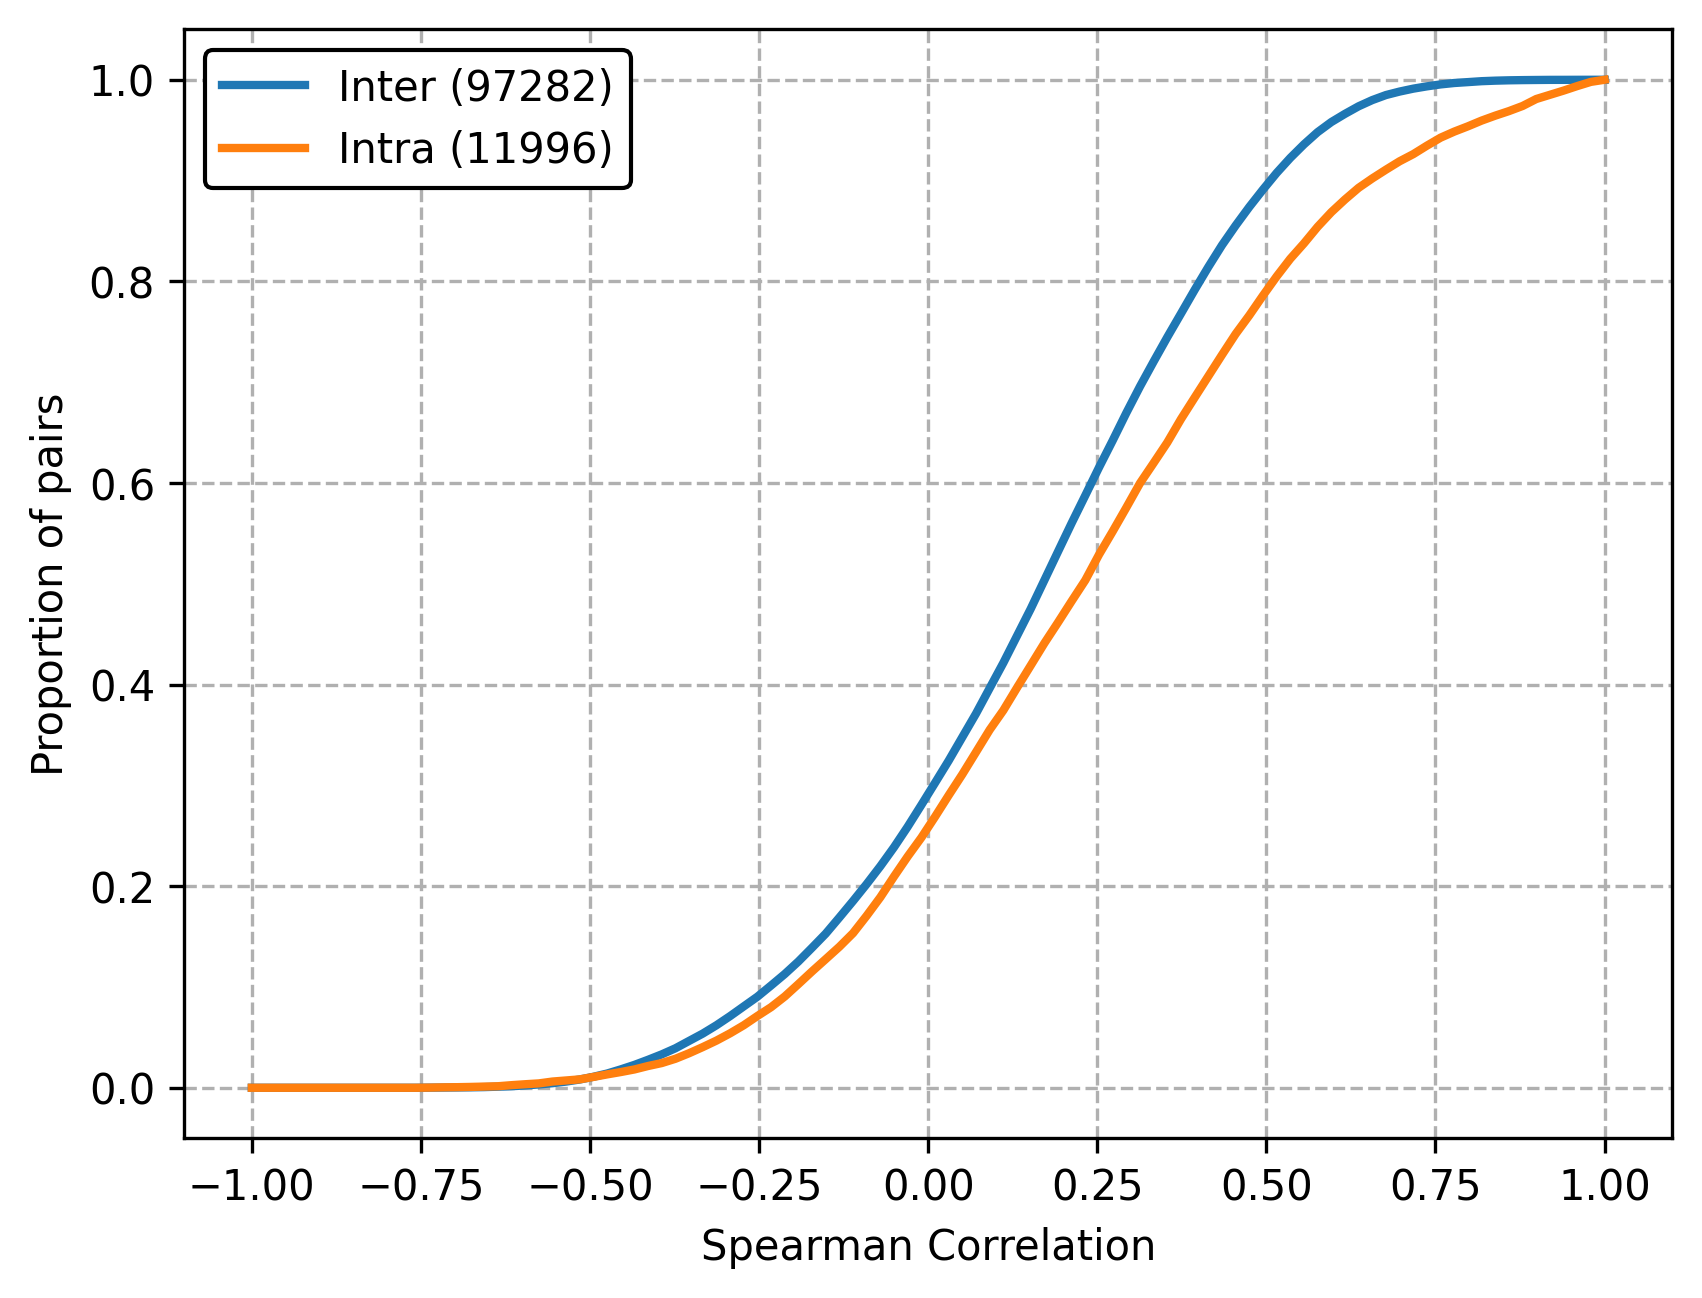

In [48]:
plt.plot(thrs, cumulative_inter, label=f'Inter ({len(CORRELATIONS_INTER)})', zorder=3, lw=2)
plt.plot(thrs, cumulative_intra, label=f'Intra ({len(CORRELATIONS_INTRA)})', zorder=3, lw=2)

plt.ylabel("Proportion of pairs")
plt.xlabel("Spearman Correlation")
plt.legend(loc='best', framealpha=1, edgecolor="k")
plt.grid(linestyle='--', zorder=2)
plt.show()

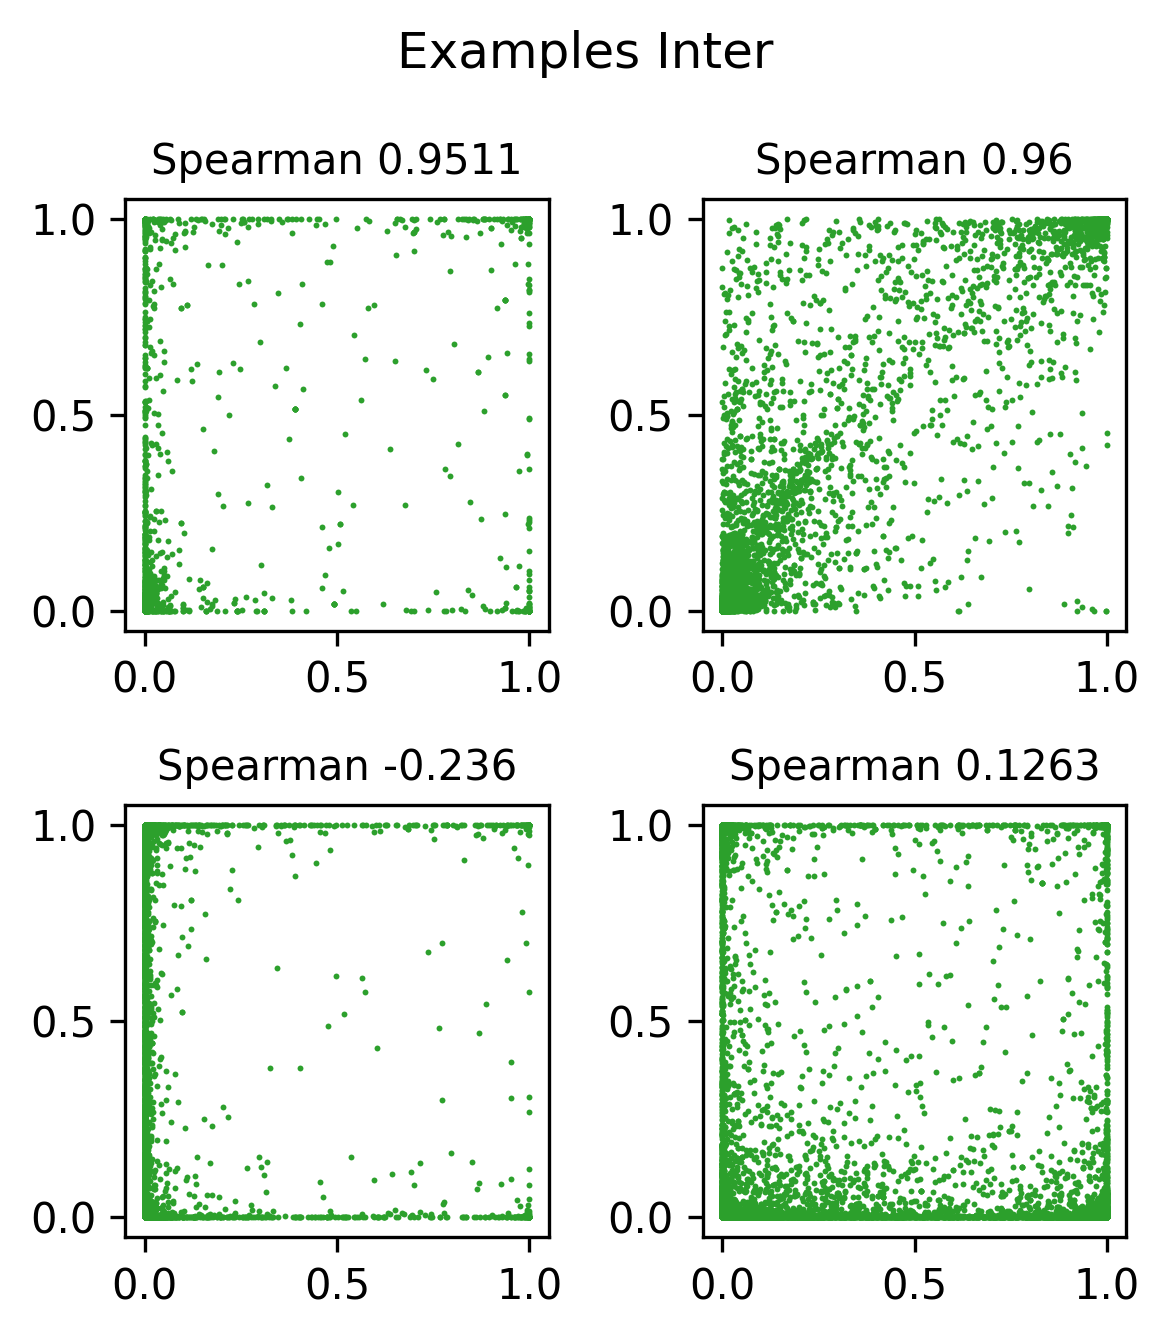

In [49]:
# Inter
inter_sample_high = CORRELATIONS[(CORRELATIONS['Same pathogen'] == False) & (CORRELATIONS['Spearman statistic'] > 0.95)].sample(n=2, random_state=42).reset_index(drop=True)
inter_sample_low = CORRELATIONS[(CORRELATIONS['Same pathogen'] == False) & (CORRELATIONS['Spearman statistic'] < 0.2)].sample(n=2, random_state=42).reset_index(drop=True)

fig, ax = plt.subplots(2, 2, figsize=(4, 4.5))

for c1, inter in enumerate([inter_sample_high, inter_sample_low]):
    for c2, (name1, name2) in enumerate(zip(inter['FullModelName1'], inter['FullModelName2'])):
        # Load predictions
        preds1 = np.load(os.path.join(PATH_TO_PREDICTIONS, name1.split("-")[0], name1.split("-")[1], "NB.npy"))
        preds2 = np.load(os.path.join(PATH_TO_PREDICTIONS, name2.split("-")[0], name2.split("-")[1], "NB.npy"))
        ax[c1][c2].scatter(preds1, preds2, c='tab:green', s=2, lw=0)
        ax[c1][c2].set_title(f"Spearman {round(spearmanr(preds1, preds2).statistic, 4)}", size=10)
        ax[c1][c2].set_xticks([0, 0.5, 1])
        ax[c1][c2].set_yticks([0, 0.5, 1])

plt.suptitle("Examples Inter")
plt.tight_layout()
plt.show()

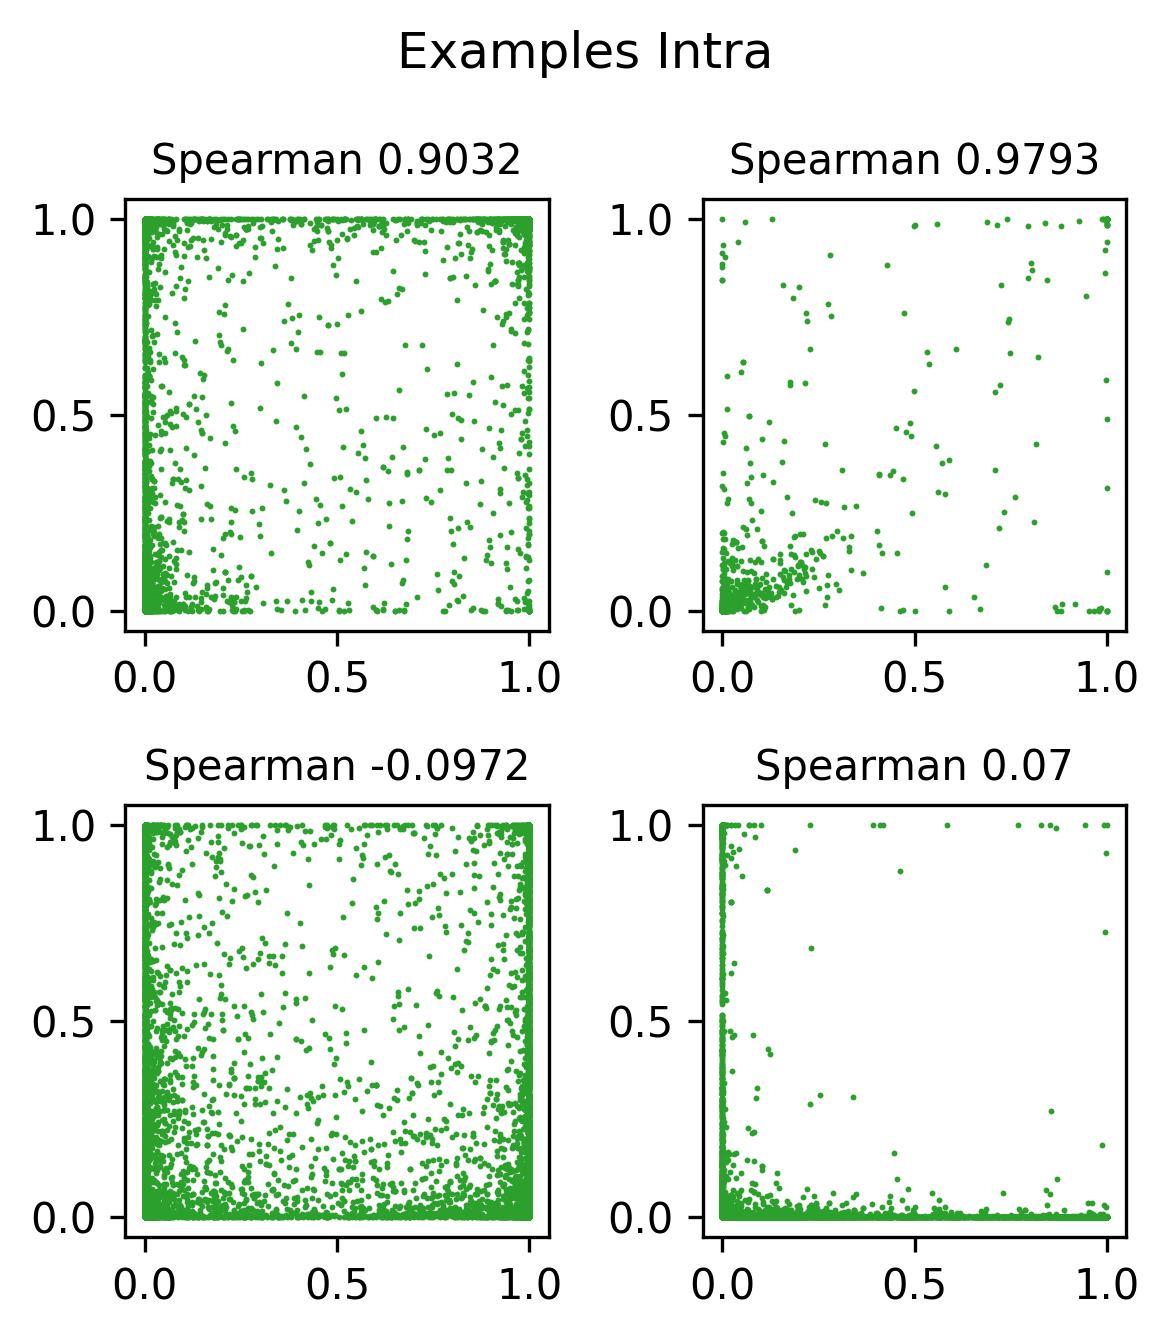

In [50]:
# Intra
intra_sample_high = CORRELATIONS[(CORRELATIONS['Same pathogen'] == True) & (CORRELATIONS['Spearman statistic'] > 0.90)].sample(n=2, random_state=42).reset_index(drop=True)
intra_sample_low = CORRELATIONS[(CORRELATIONS['Same pathogen'] == True) & (CORRELATIONS['Spearman statistic'] < 0.1)].sample(n=2, random_state=42).reset_index(drop=True)

fig, ax = plt.subplots(2, 2, figsize=(4, 4.5))

for c1, intra in enumerate([intra_sample_high, intra_sample_low]):
    for c2, (name1, name2) in enumerate(zip(intra['FullModelName1'], intra['FullModelName2'])):
        # Load predictions
        preds1 = np.load(os.path.join(PATH_TO_PREDICTIONS, name1.split("-")[0], name1.split("-")[1], "NB.npy"))
        preds2 = np.load(os.path.join(PATH_TO_PREDICTIONS, name2.split("-")[0], name2.split("-")[1], "NB.npy"))
        ax[c1][c2].scatter(preds1, preds2, c='tab:green', s=2, lw=0)
        ax[c1][c2].set_title(f"Spearman {round(spearmanr(preds1, preds2).statistic, 4)}", size=10)
        ax[c1][c2].set_xticks([0, 0.5, 1])
        ax[c1][c2].set_yticks([0, 0.5, 1])

plt.suptitle("Examples Intra")
plt.tight_layout()
plt.show()

In [51]:
### PATHOGEN PERSPECTIVE ###

In [62]:
# abaumannii_path = "../data/abaumannii_organism"
# spneunmoniae_path = "../data/spneumoniae_organism"

# tasks1 = sorted(os.listdir(abaumannii_path))
# tasks2 = sorted(os.listdir(spneunmoniae_path))

# tasks1 = ["abaumannii_organism-" + i.replace(".csv", "") + "-NB" for i in tasks1]
# tasks2 = ["spneumoniae_organism-" + i.replace(".csv", "") + "-NB" for i in tasks2]

# for t1 in tasks1:
#     for t2 in tasks2:

#         df = CORRELATIONS_FILTERED[(CORRELATIONS_FILTERED['FullModelName1'] == t1) & (CORRELATIONS_FILTERED['FullModelName2'] == t2)]
#         if len(df) != 1:
#             print(t1, t2)


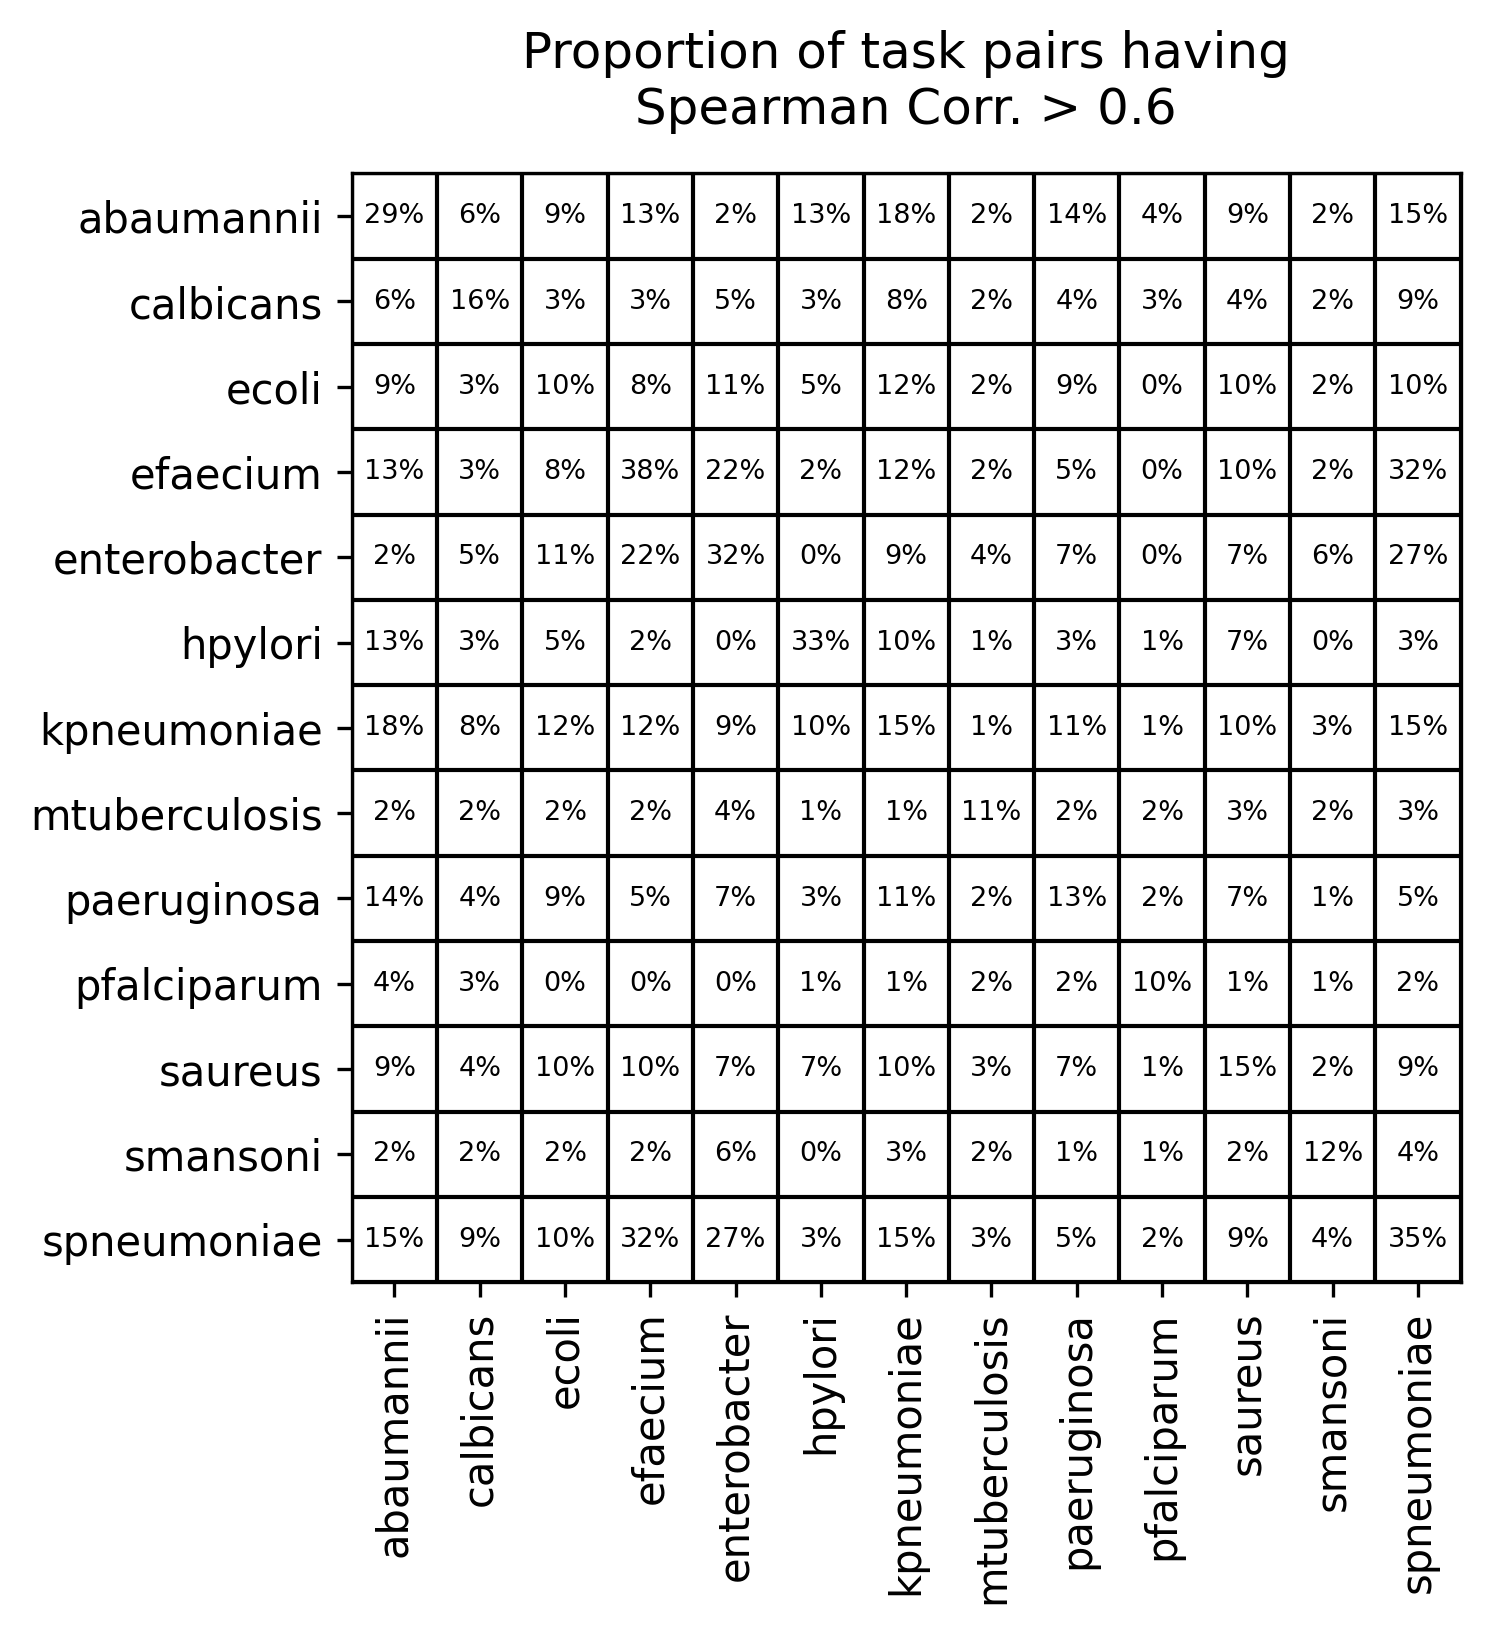

In [63]:
# At the pathogen level
pathogens = sorted(set(CORRELATIONS['Pathogen1'].tolist() + CORRELATIONS['Pathogen2'].tolist()))
X = np.zeros((len(pathogens), len(pathogens))).astype(str)

fig, ax = plt.subplots()
ax.imshow(X.astype('float'), cmap='gray', vmin=-10, vmax=-9)


ax.set_xticks(np.arange(X.shape[1]+1)-0.5, minor=True)
ax.set_yticks(np.arange(X.shape[0]+1)-0.5, minor=True)
ax.grid(True, which='minor', color='black', linewidth=1)
ax.tick_params(which='minor', bottom=False, left=False)

ax.set_xticks(np.arange(X.shape[1]))
ax.set_yticks(np.arange(X.shape[0]))
ax.set_xticklabels([i.split("_")[0] for i in pathogens], rotation=90)
ax.set_yticklabels([i.split("_")[0] for i in pathogens])

for i in range(X.shape[0]):
    for j in range(X.shape[1]):

        # Get data
        pat1, pat2 = pathogens[i], pathogens[j]
        # CORRELATIONS_FILTERED = CORRELATIONS[CORRELATIONS['Same pathogen'] == False]
        CORRELATIONS_FILTERED = CORRELATIONS.copy()
        CORRELATIONS_FILTERED = CORRELATIONS_FILTERED[(CORRELATIONS_FILTERED['Pathogen1'] == pat1) & (CORRELATIONS_FILTERED['Pathogen2'] == pat2) | 
                                                      (CORRELATIONS_FILTERED['Pathogen1'] == pat2) & (CORRELATIONS_FILTERED['Pathogen2'] == pat1)].reset_index(drop=True)

        SPEARMAN_CUTOFF = 0.6
        sp = CORRELATIONS_FILTERED[CORRELATIONS_FILTERED['Spearman statistic'] > SPEARMAN_CUTOFF]
        label = str(round(len(sp) / len(CORRELATIONS_FILTERED) * 100))
        ax.text(j, i, f"{label}%", va='center', ha='center', color='black', size=6.5)

ax.set_title(f"Proportion of task pairs having\nSpearman Corr. > {SPEARMAN_CUTOFF}", pad=12)
plt.show()


In [75]:
X = np.zeros((len(pathogens), len(pathogens)))

for i in range(X.shape[0]):
    for j in range(X.shape[1]):

        # Get data
        pat1, pat2 = pathogens[i], pathogens[j]
        # CORRELATIONS_FILTERED = CORRELATIONS[CORRELATIONS['Same pathogen'] == False]
        CORRELATIONS_FILTERED = CORRELATIONS.copy()
        CORRELATIONS_FILTERED = CORRELATIONS_FILTERED[(CORRELATIONS_FILTERED['Pathogen1'] == pat1) & (CORRELATIONS_FILTERED['Pathogen2'] == pat2) | 
                                                      (CORRELATIONS_FILTERED['Pathogen1'] == pat2) & (CORRELATIONS_FILTERED['Pathogen2'] == pat1)].reset_index(drop=True)
        
        X[i][j] = len(CORRELATIONS_FILTERED)

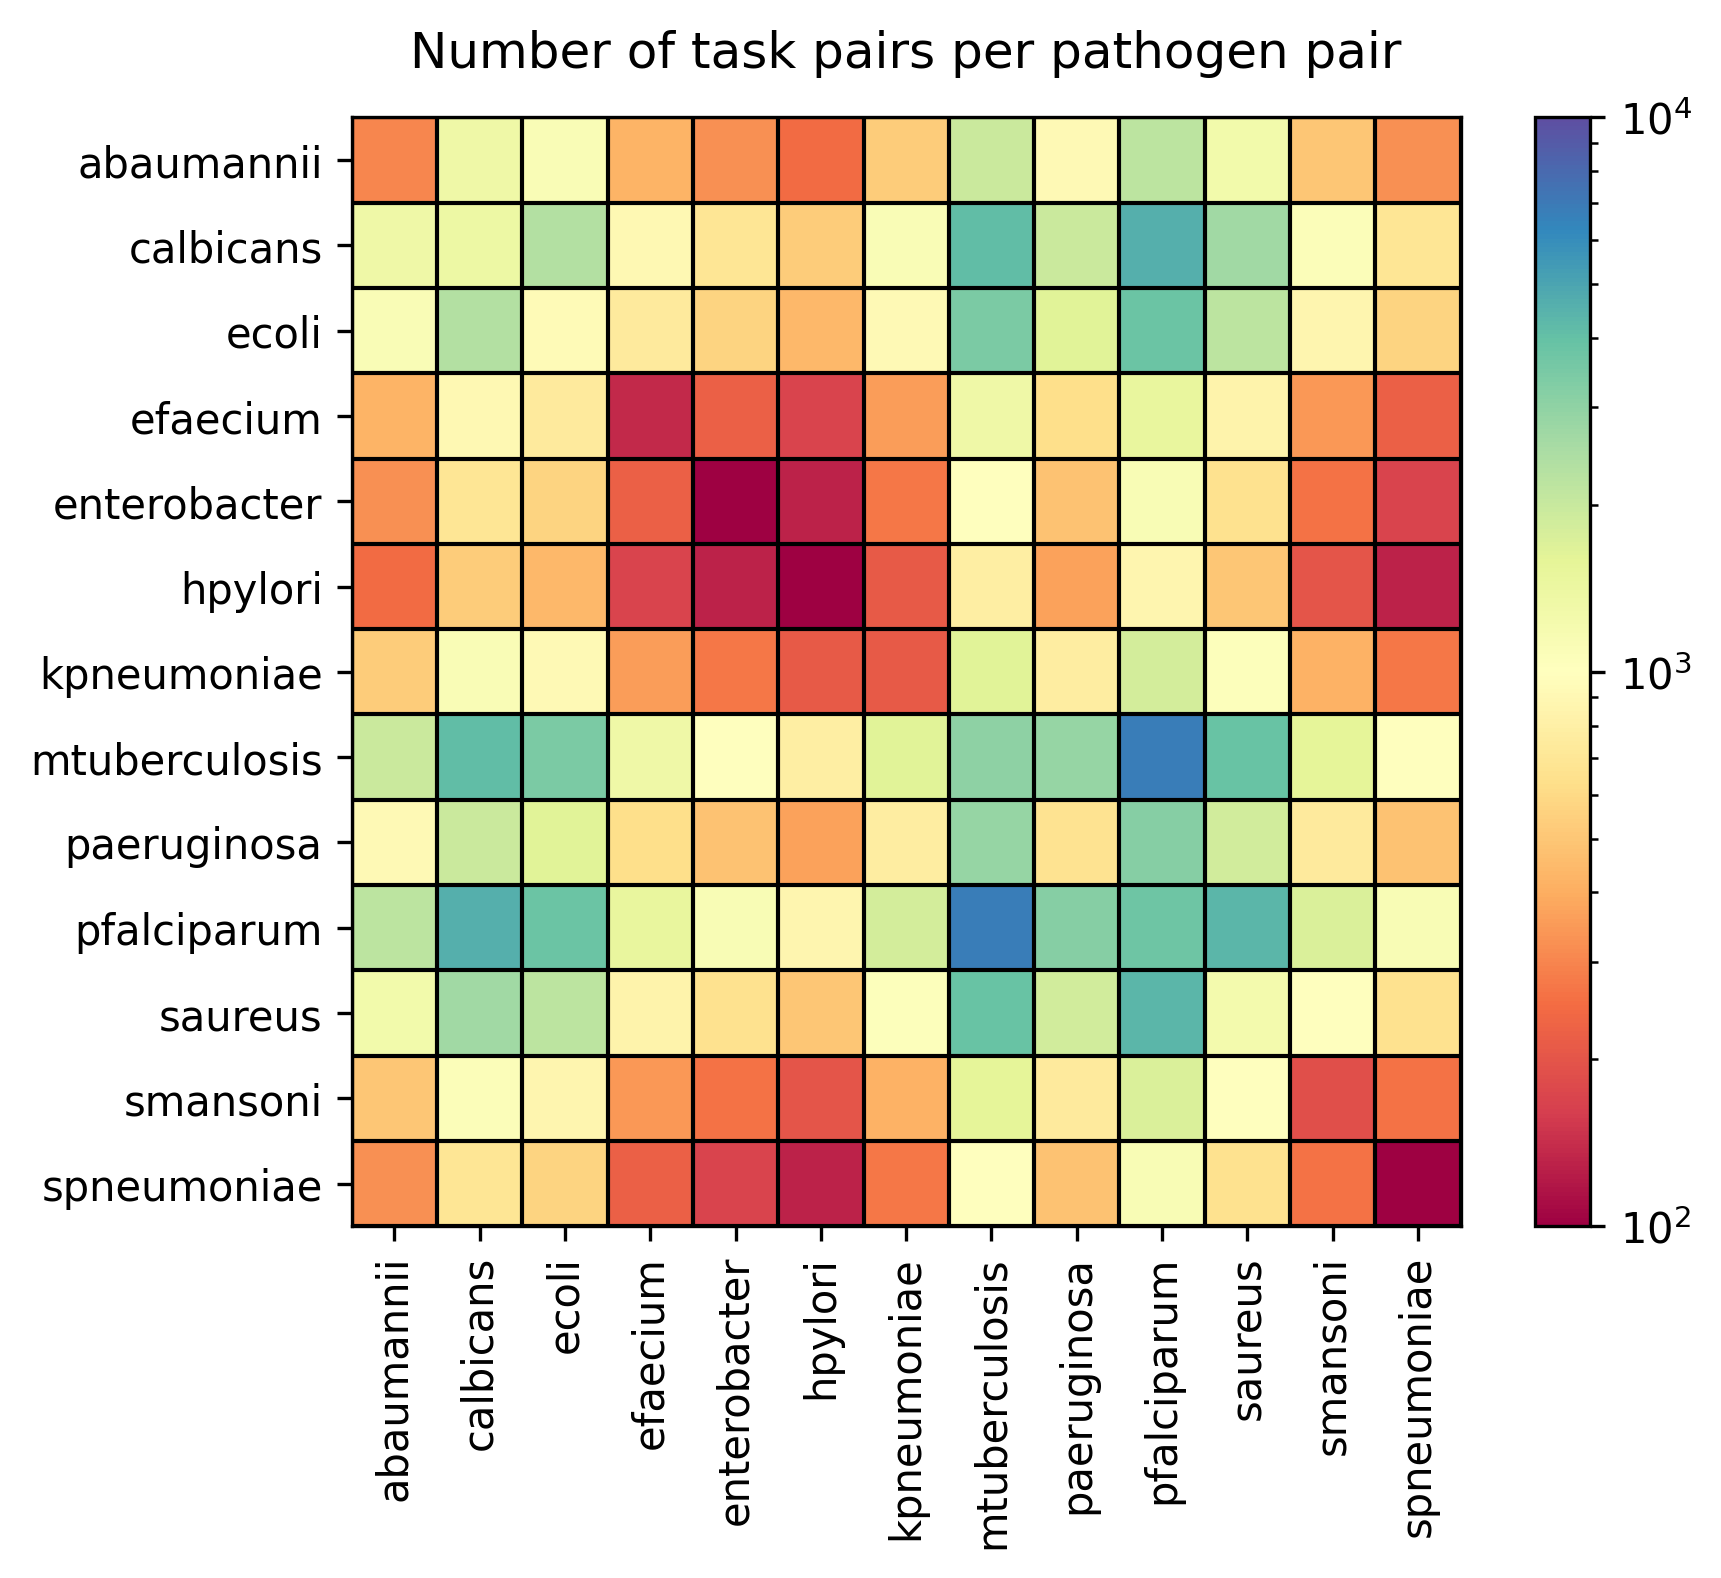

In [90]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(X.shape[1]+1)-0.5, minor=True)
ax.set_yticks(np.arange(X.shape[0]+1)-0.5, minor=True)
ax.grid(True, which='minor', color='black', linewidth=1)
ax.tick_params(which='minor', bottom=False, left=False)

ax.set_xticks(np.arange(X.shape[1]))
ax.set_yticks(np.arange(X.shape[0]))
ax.set_xticklabels([i.split("_")[0] for i in pathogens], rotation=90)
ax.set_yticklabels([i.split("_")[0] for i in pathogens])

# im = ax.imshow(X.astype('float'), cmap='Spectral', vmin=0, vmax=6000)
im = ax.imshow(X.astype(float), cmap='Spectral', norm=LogNorm(vmin=100, vmax=10000))


cbar = fig.colorbar(im, ax=ax)
ax.set_title(f"Number of task pairs per pathogen pair", pad=12)
plt.show()
